In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape)

(50000, 32, 32, 3)


In [7]:
accuracy = []

for k in range(1, 20):
  print("k: ", k)
  acc = []
  for f in range(5):
    # divide data into folds
    validationX, validationY = X_train[f*10000:(f+1)*10000], Y_train[f*10000:(f+1)*10000]
    trainX = np.concatenate((X_train[:f*10000], X_train[(f+1)*10000:]), axis = 0)
    trainY = np.concatenate((Y_train[:f*10000], Y_train[(f+1)*10000:]), axis = 0)
    cm = ce = 0        

    for i in range(len(validationX)):
      man_distance = []
      euc_distance = []

      for j in range(len(trainX)):
        
       
        l1 = np.sum(np.absolute(np.subtract(validationX[i], trainX[j])))

        
        l2 = np.sqrt(np.sum((validationX[i] - trainX[j])**2))

        man_distance.append([l1, trainY[j][0]])
        euc_distance.append([l2, trainY[j][0]])
        
        if j == 400:
            break

      man_distance = np.array(man_distance)
      man_distance = man_distance[man_distance[:, 0].argsort()]
      euc_distance = np.array(euc_distance)
      euc_distance = euc_distance[euc_distance[:, 0].argsort()]
      
   
      values = man_distance[:k, 1]

   
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))

    
      if most_frequent_value == validationY[i]:
        cm += 1
        
    
      values = euc_distance[:k, 1]
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validationY[i]:
        ce += 1

      

      if i == 120:
        break

    acc.append([cm/100, ce/100])
  accuracy.append([acc, k])

print(accuracy)


k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
[[[[0.18, 0.18], [0.29, 0.21], [0.17, 0.12], [0.24, 0.21], [0.13, 0.14]], 1], [[[0.17, 0.11], [0.21, 0.24], [0.19, 0.15], [0.24, 0.22], [0.16, 0.14]], 2], [[[0.27, 0.12], [0.27, 0.18], [0.18, 0.18], [0.25, 0.18], [0.14, 0.15]], 3], [[[0.2, 0.17], [0.29, 0.29], [0.19, 0.17], [0.2, 0.25], [0.16, 0.18]], 4], [[[0.13, 0.17], [0.25, 0.24], [0.2, 0.18], [0.24, 0.23], [0.12, 0.19]], 5], [[[0.14, 0.16], [0.24, 0.2], [0.21, 0.18], [0.25, 0.2], [0.16, 0.17]], 6], [[[0.16, 0.17], [0.27, 0.22], [0.18, 0.17], [0.25, 0.19], [0.21, 0.2]], 7], [[[0.2, 0.2], [0.28, 0.2], [0.24, 0.18], [0.22, 0.21], [0.2, 0.23]], 8], [[[0.15, 0.16], [0.28, 0.21], [0.22, 0.19], [0.23, 0.21], [0.22, 0.22]], 9], [[[0.17, 0.15], [0.27, 0.24], [0.22, 0.2], [0.27, 0.24], [0.25, 0.22]], 10], [[[0.19, 0.13], [0.26, 0.19], [0.23, 0.22], [0.23, 0.28], [0.25, 0.23]], 11], [[[0.17, 0.14], [0.24, 0.2], [0.23, 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


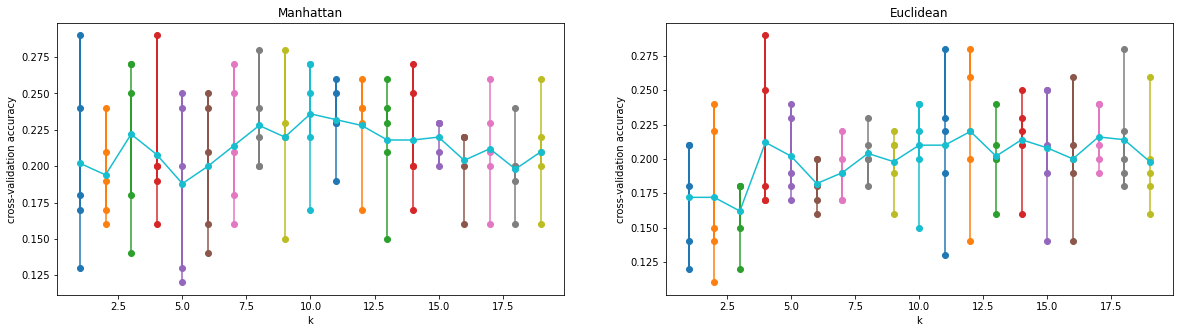

In [9]:
avg1 = []
avg2 = []
k = np.array(accuracy)[:,1]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Manhattan')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l1 = np.array(accuracy[i][0])[:,0]
  avg1.append(np.average(l1))
  plt.plot(a, l1, 'o-')
  
plt.plot(k, avg1, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')


plt.subplot(1,2,2)
plt.title('Euclidean')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l2 = np.array(accuracy[i][0])[:,1]
  avg2.append(np.average(l2))
  plt.plot(a, l2, 'o-')

plt.plot(k, avg2, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')

plt.show()